# Google Play App Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.preprocessing import LabelEncoder

In [41]:
Gapp_info = pd.read_csv('googleplaystore.csv')
Gapp_review = pd.read_csv('googleplaystore_user_reviews.csv')

In [42]:
Gapp_info.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Google Play App Informations

In [43]:
# rename 
Gapp_info.rename(columns = {'Type': 'Price_Type','Content Rating': 'Content_Rating', 'Last Updated':'Last_Updated', 'Current Ver': 'Current_Ver', 'Android Ver':'Android_Ver'}, inplace= True)
Gapp_info.head()

,App,Category,Rating,Reviews,Size,Installs,Price_Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# check null value
Gapp_info.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Price_Type           1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [44]:
# remove rating = null
Gapp_info.dropna(subset=['Rating'], inplace = True)

In [45]:
print(Gapp_info.duplicated().sum())
Gapp_info.drop_duplicates(keep = 'first', inplace = True)

474


In [8]:
Gapp_info.duplicated().sum()

0

In [46]:
Gapp_info_re = Gapp_info.drop(columns = ['Genres', 'Last_Updated', 'Current_Ver','Android_Ver'])
Gapp_info_re.head()

,App,Category,Rating,Reviews,Size,Installs,Price_Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [10]:
Gapp_info_re.duplicated().sum()

2

In [48]:
Gapp_info_re.drop_duplicates(keep = 'first', inplace = True)

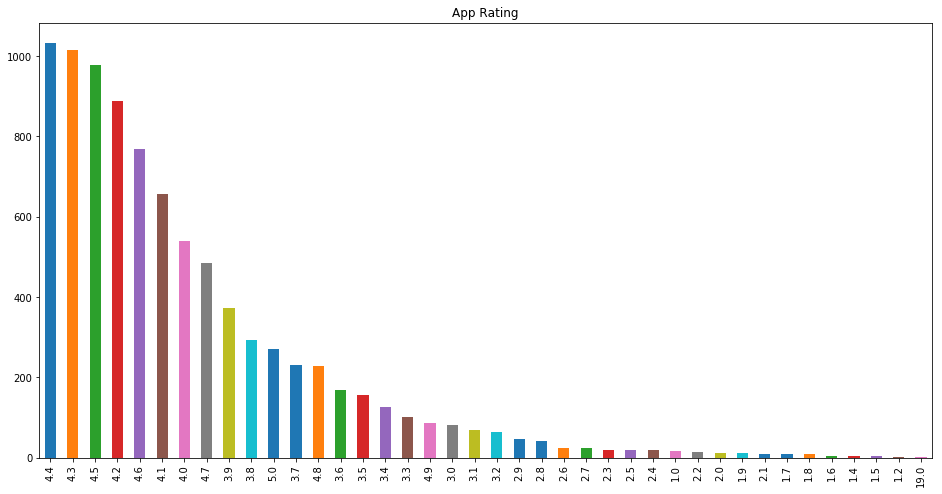

In [12]:
plt.figure(figsize=(16,8))
Gapp_info.Rating.value_counts().plot(kind = 'bar')
plt.title('App Rating')
plt.show()

In [49]:
Gapp_info_re = Gapp_info_re[Gapp_info_re.Rating != 19.0]

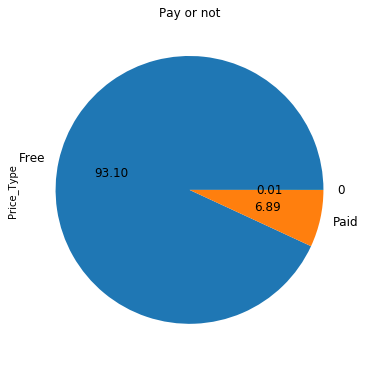

In [14]:
plt.figure(figsize=(6,8))
Gapp_info.Price_Type.value_counts().plot(kind = 'pie', autopct='%.2f', fontsize=12)
plt.title('Pay or not')
plt.show()

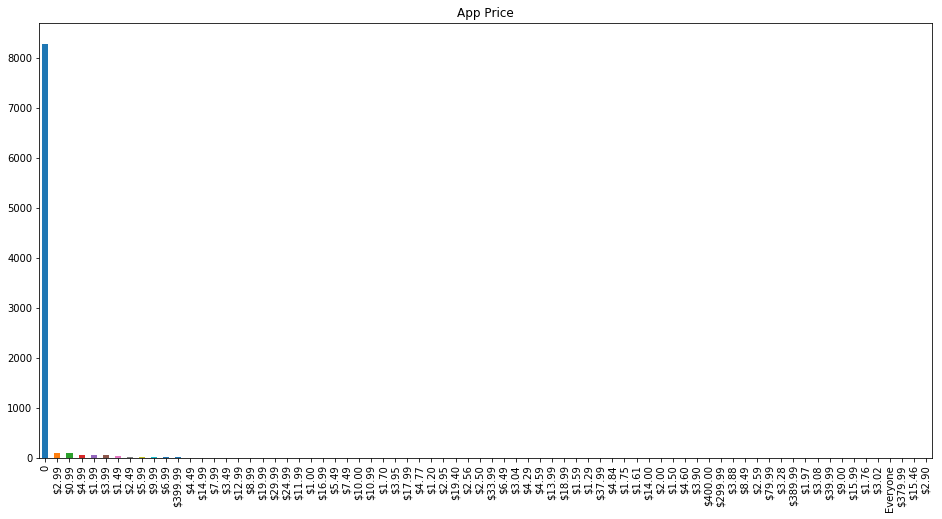

In [15]:
plt.figure(figsize=(16,8))
Gapp_info.Price.value_counts().plot(kind = 'bar')
plt.title('App Price')
plt.show()

In [50]:
Gapp_info_re = Gapp_info_re[Gapp_info_re.Price != 'Everyone']

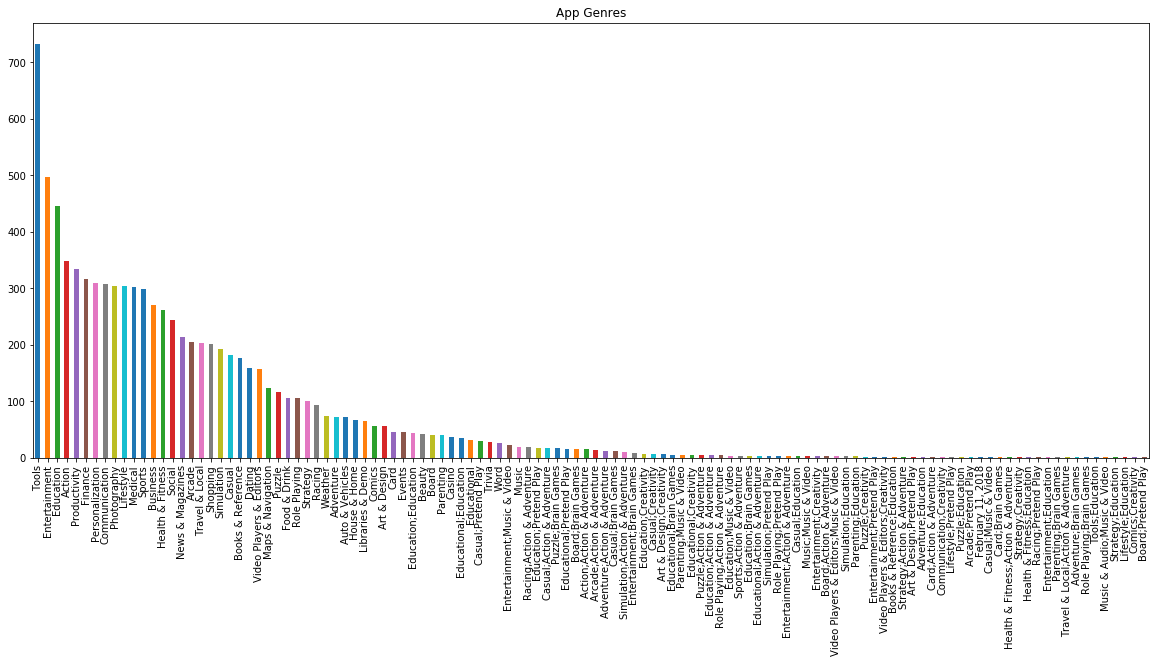

In [17]:
plt.figure(figsize=(20,8))
Gapp_info.Genres.value_counts().plot(kind = 'bar')
plt.title('App Genres')
plt.show()

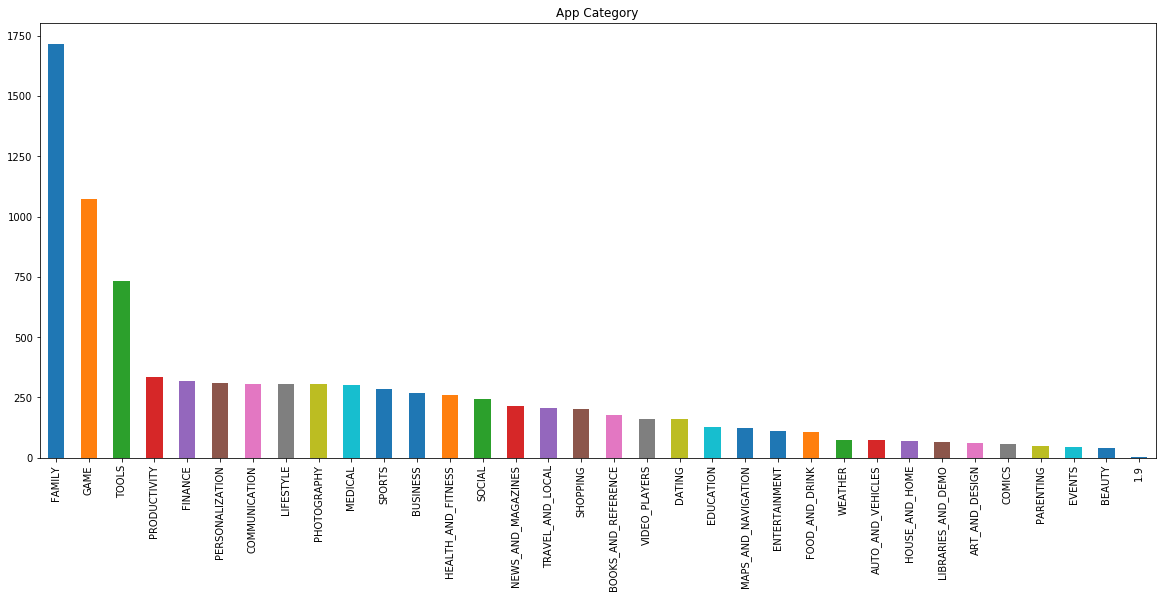

In [18]:
plt.figure(figsize=(20,8))
Gapp_info.Category.value_counts().plot(kind = 'bar')
plt.title('App Category')
plt.show()

In [51]:
Gapp_info_re = Gapp_info_re[Gapp_info_re.Category != '1.9']

In [52]:
Gapp_info_re = Gapp_info_re.replace('ART_AND_DESIGN', 1)
Gapp_info_re = Gapp_info_re.replace('AUTO_AND_VEHICLES', 2)
Gapp_info_re = Gapp_info_re.replace('BEAUTY', 3)
Gapp_info_re = Gapp_info_re.replace('BOOKS_AND_REFERENCE', 4)
Gapp_info_re = Gapp_info_re.replace('BUSINESS', 5)
Gapp_info_re = Gapp_info_re.replace('COMICS', 6)
Gapp_info_re = Gapp_info_re.replace('COMMUNICATION', 7)
Gapp_info_re = Gapp_info_re.replace('DATING', 8)
Gapp_info_re = Gapp_info_re.replace('EDUCATION', 9)
Gapp_info_re = Gapp_info_re.replace('ENTERTAINMENT', 10)
Gapp_info_re = Gapp_info_re.replace('EVENTS', 11)
Gapp_info_re = Gapp_info_re.replace('FINANCE', 12)
Gapp_info_re = Gapp_info_re.replace('FOOD_AND_DRINK', 13)
Gapp_info_re = Gapp_info_re.replace('HEALTH_AND_FITNESS', 14)
Gapp_info_re = Gapp_info_re.replace('HOUSE_AND_HOME', 15)
Gapp_info_re = Gapp_info_re.replace('LIBRARIES_AND_DEMO', 16)
Gapp_info_re = Gapp_info_re.replace('LIFESTYLE', 17)
Gapp_info_re = Gapp_info_re.replace('GAME', 18)
Gapp_info_re = Gapp_info_re.replace('FAMILY', 19)
Gapp_info_re = Gapp_info_re.replace('MEDICAL', 20)
Gapp_info_re = Gapp_info_re.replace('SOCIAL', 21)
Gapp_info_re = Gapp_info_re.replace('SHOPPING', 22)
Gapp_info_re = Gapp_info_re.replace('PHOTOGRAPHY', 23)
Gapp_info_re = Gapp_info_re.replace('SPORTS', 24)
Gapp_info_re = Gapp_info_re.replace('TRAVEL_AND_LOCAL', 25)
Gapp_info_re = Gapp_info_re.replace('TOOLS', 26)
Gapp_info_re = Gapp_info_re.replace('PERSONALIZATION', 27)
Gapp_info_re = Gapp_info_re.replace('PRODUCTIVITY', 28)
Gapp_info_re = Gapp_info_re.replace('PARENTING', 29)
Gapp_info_re = Gapp_info_re.replace('WEATHER', 30)
Gapp_info_re = Gapp_info_re.replace('VIDEO_PLAYERS', 31)
Gapp_info_re = Gapp_info_re.replace('NEWS_AND_MAGAZINES', 32)
Gapp_info_re = Gapp_info_re.replace('MAPS_AND_NAVIGATION', 33)


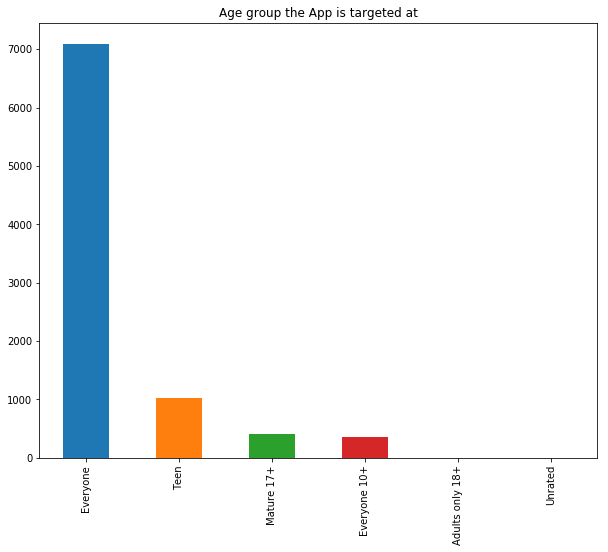

In [22]:
plt.figure(figsize=(10,8))
Gapp_info.Content_Rating.value_counts().plot(kind = 'bar')
plt.title('Age group the App is targeted at')
plt.show()

In [12]:
print(Gapp_info.Content_Rating.value_counts())
Gapp_info_re['Content_Rating'].unique()

Everyone           7095
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [53]:
Gapp_info_re = Gapp_info_re[Gapp_info_re.Content_Rating != 'Unrated']
Gapp_info_re = Gapp_info_re.replace('Everyone', 1)
Gapp_info_re = Gapp_info_re.replace('Teen', 2)
Gapp_info_re = Gapp_info_re.replace('Everyone 10+', 3)
Gapp_info_re = Gapp_info_re.replace('Mature 17+', 4)
Gapp_info_re = Gapp_info_re.replace('Adults only 18+', 5)


In [54]:
# Install Count
Gapp_info_re = Gapp_info_re[Gapp_info_re.Installs != 'Free']
Gapp_info_re['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

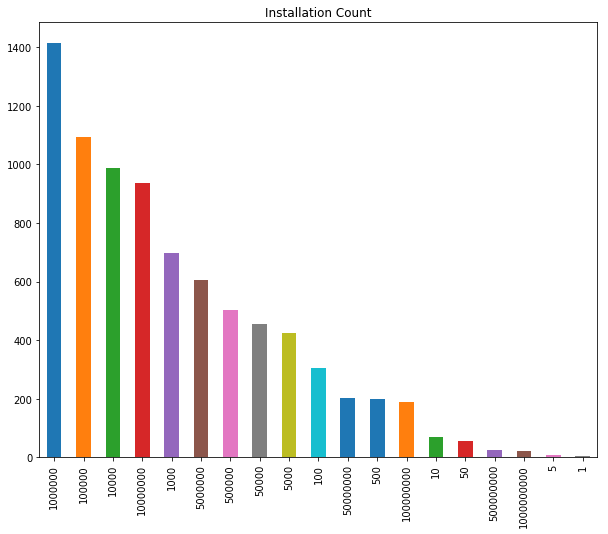

In [173]:
plt.figure(figsize=(10,8))
Gapp_info_re.Installs.value_counts().plot(kind = 'bar')
plt.title('Installation Count')
plt.show()

In [55]:
Gapp_info_re = Gapp_info_re.replace('10,000+', 10000)
Gapp_info_re = Gapp_info_re.replace('500,000+', 500000)
Gapp_info_re = Gapp_info_re.replace('5,000,000+', 5000000)
Gapp_info_re = Gapp_info_re.replace('50,000,000+', 50000000)
Gapp_info_re = Gapp_info_re.replace('100,000+', 100000)
Gapp_info_re = Gapp_info_re.replace('1,000,000+', 1000000)
Gapp_info_re = Gapp_info_re.replace('10,000,000+', 10000000)
Gapp_info_re = Gapp_info_re.replace('5,000+', 5000)
Gapp_info_re = Gapp_info_re.replace('100,000,000+', 100000000)
Gapp_info_re = Gapp_info_re.replace('1,000,000,000+', 1000000000)
Gapp_info_re = Gapp_info_re.replace('1,000+', 1000)
Gapp_info_re = Gapp_info_re.replace('500,000,000+', 500000000)
Gapp_info_re = Gapp_info_re.replace('100+', 100)
Gapp_info_re = Gapp_info_re.replace('500+', 500)
Gapp_info_re = Gapp_info_re.replace('10+', 10)
Gapp_info_re = Gapp_info_re.replace('5+', 5)
Gapp_info_re = Gapp_info_re.replace('50+', 50)
Gapp_info_re = Gapp_info_re.replace('1+', 1)
Gapp_info_re = Gapp_info_re.replace('50,000+', 50000)


In [56]:
install = []

for i in Gapp_info_re.Installs:
    if i < 1000: 
        install.append(500)
    elif 1000 <= i < 10000:
        install.append(5000)
    elif 10000 <= i < 100000:
        install.append(50000)
    elif 100000 <= i < 1000000:
        install.append(500000)
    elif 1000000 <= i < 10000000:
        install.append(5000000)
    elif 10000000 <= i < 100000000:
        install.append(50000000)
    elif 100000000 <= i < 1000000000:
        install.append(500000000)
    else:
        install.append(1000000000)
        
Gapp_info_re['Installs_re'] = install

In [57]:
print(Gapp_info_re['Price_Type'].value_counts())
Gapp_info_re = Gapp_info_re.replace('Free', 0)
Gapp_info_re = Gapp_info_re.replace('Paid', 1)
Gapp_info_re['Price_Type'].unique()

Free    8276
Paid     613
Name: Price_Type, dtype: int64


array([0, 1])

In [58]:
Gapp_info_re['Reviews'] = Gapp_info_re['Reviews'].apply(float)
Gapp_info_re['Installs'] = Gapp_info_re['Installs'].apply(int)

Gapp_info_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8889 entries, 0 to 10840
Data columns (total 10 columns):
App               8889 non-null object
Category          8889 non-null int64
Rating            8889 non-null float64
Reviews           8889 non-null float64
Size              8889 non-null object
Installs          8889 non-null int64
Price_Type        8889 non-null int64
Price             8889 non-null object
Content_Rating    8889 non-null int64
Installs_re       8889 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 763.9+ KB


In [59]:
Gapp_info_re.head()

,App,Category,Rating,Reviews,Size,Installs,Price_Type,Price,Content_Rating,Installs_re
0,Photo Editor & Candy Camera & Grid & ScrapBook,1,4.1,159.0,19M,10000,0,0,1,50000
1,Coloring book moana,1,3.9,967.0,14M,500000,0,0,1,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1,4.7,87510.0,8.7M,5000000,0,0,1,5000000
3,Sketch - Draw & Paint,1,4.5,215644.0,25M,50000000,0,0,2,50000000
4,Pixel Draw - Number Art Coloring Book,1,4.3,967.0,2.8M,100000,0,0,1,500000


In [60]:
Gapp_info_re.drop_duplicates(subset = 'App', keep = 'first', inplace = True)

In [62]:
Gapp_info_re.reset_index(inplace = True, drop = True)
Gapp_info_re.head()

,App,Category,Rating,Reviews,Size,Installs,Price_Type,Price,Content_Rating,Installs_re
0,Photo Editor & Candy Camera & Grid & ScrapBook,1,4.1,159.0,19M,10000,0,0,1,50000
1,Coloring book moana,1,3.9,967.0,14M,500000,0,0,1,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1,4.7,87510.0,8.7M,5000000,0,0,1,5000000
3,Sketch - Draw & Paint,1,4.5,215644.0,25M,50000000,0,0,2,50000000
4,Pixel Draw - Number Art Coloring Book,1,4.3,967.0,2.8M,100000,0,0,1,500000


### Chenge size into float

In [63]:
S = []
for i in Gapp_info_re.Size:
    if i[-1] == 'M':
        s = i[:-1]
        s = float(s)*1000000
        S.append(s)
    elif i[-1] == 'k':
        s = i[:-1]
        s = float(s)*1000
        S.append(s)
    else:
        S.append(0)

In [64]:
S = pd.DataFrame(S, columns = ['S'], index = Gapp_info_re.index)
M = S.mean()
print("%.f" % M)

18653076


In [65]:
Size = []
for i in Gapp_info_re.Size:
    if i[-1] == 'M':
        s = i[:-1]
        s = float(s)*1000000
        Size.append(s)
    elif i == 'Varies with device':
        Size.append(float(18653076))
    else:
        s = i[:-1]
        s = float(s)*1000
        Size.append(s)

In [66]:
Size = pd.DataFrame(Size, columns = ['Size'], index = Gapp_info_re.index)
Size.head()

,Size
0,19000000.0
1,14000000.0
2,8700000.0
3,25000000.0
4,2800000.0


In [26]:
Gapp_info_re['Size_r'] = Size

### Separate $ and number in Price column

In [67]:
Price = []

for i in Gapp_info_re.Price: 
    if i == '0':
        Price.append(0.0)
    else:
        p = i[1:]
        Price.append(float(p))

In [69]:
Price = pd.DataFrame(Price, columns = ['Price_r'], index = Gapp_info_re.index)
Price.head()

,Price_r
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [70]:
Gapp_info_re['Price_r'] = Price

### New column for Rating

In [71]:
Rating_r = []

for i in range(Gapp_info_re.Rating.shape[0]):
    r = Gapp_info_re.Rating[i]
    if r < 2.0:
        Rating_r.append(float(1.5))
    elif 2.0 <= r < 3.0:
        Rating_r.append(float(2.5))
    elif 3.0 <= r < 4.0:
        Rating_r.append(float(3.5))
    elif 4.0 <= r <5.0:
        Rating_r.append(float(4.5))
    else:
        Rating_r.append(float(5.0))
    

In [72]:
Rating_re = pd.DataFrame(Rating_r, columns = ['Rating_r'], index = Gapp_info_re.index)
Rating_re.head()

,Rating_r
0,4.5
1,3.5
2,4.5
3,4.5
4,4.5


In [73]:
Gapp_info_re['Rating_r'] = Rating_re

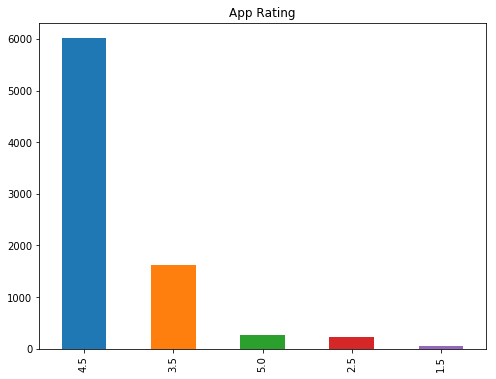

In [39]:
plt.figure(figsize=(8,6))
Gapp_info_re.Rating_r.value_counts().plot(kind = 'bar')
plt.title('App Rating')
plt.show()

In [74]:
rating = []
for i in Gapp_info_re.Rating:
    if i >= 4.0:
        rating.append(1)
    else:
        rating.append(0)
        
Gapp_info_re['rating_type'] = rating
Gapp_info_re.head()

,App,Category,Rating,Reviews,Size,Installs,Price_Type,Price,Content_Rating,Installs_re,Price_r,Rating_r,rating_type
0,Photo Editor & Candy Camera & Grid & ScrapBook,1,4.1,159.0,19M,10000,0,0,1,50000,0.0,4.5,1
1,Coloring book moana,1,3.9,967.0,14M,500000,0,0,1,500000,0.0,3.5,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1,4.7,87510.0,8.7M,5000000,0,0,1,5000000,0.0,4.5,1
3,Sketch - Draw & Paint,1,4.5,215644.0,25M,50000000,0,0,2,50000000,0.0,4.5,1
4,Pixel Draw - Number Art Coloring Book,1,4.3,967.0,2.8M,100000,0,0,1,500000,0.0,4.5,1


### Correlation Heatmap

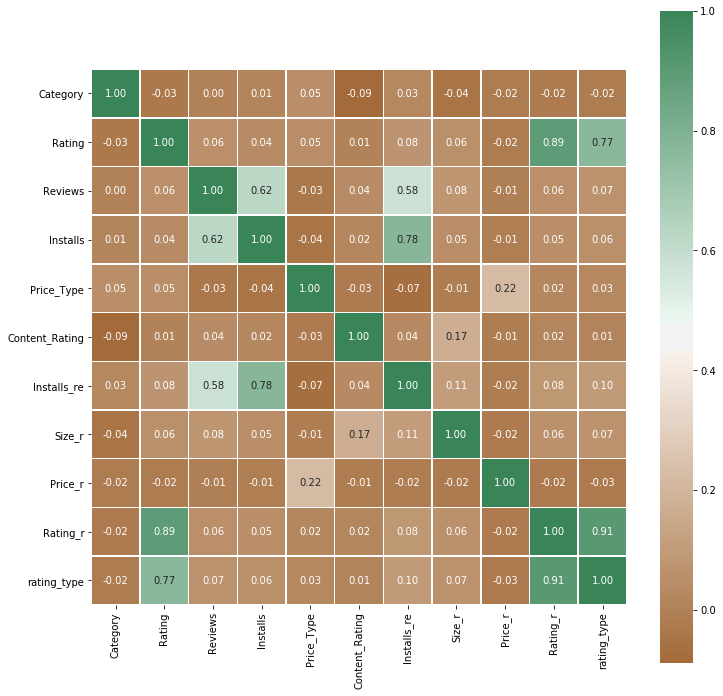

In [49]:
f, ax = plt.subplots(figsize=(12, 12))
corr = Gapp_info_re.corr()
sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(400,500, as_cmap=True), square=True, ax=ax)
plt.show()

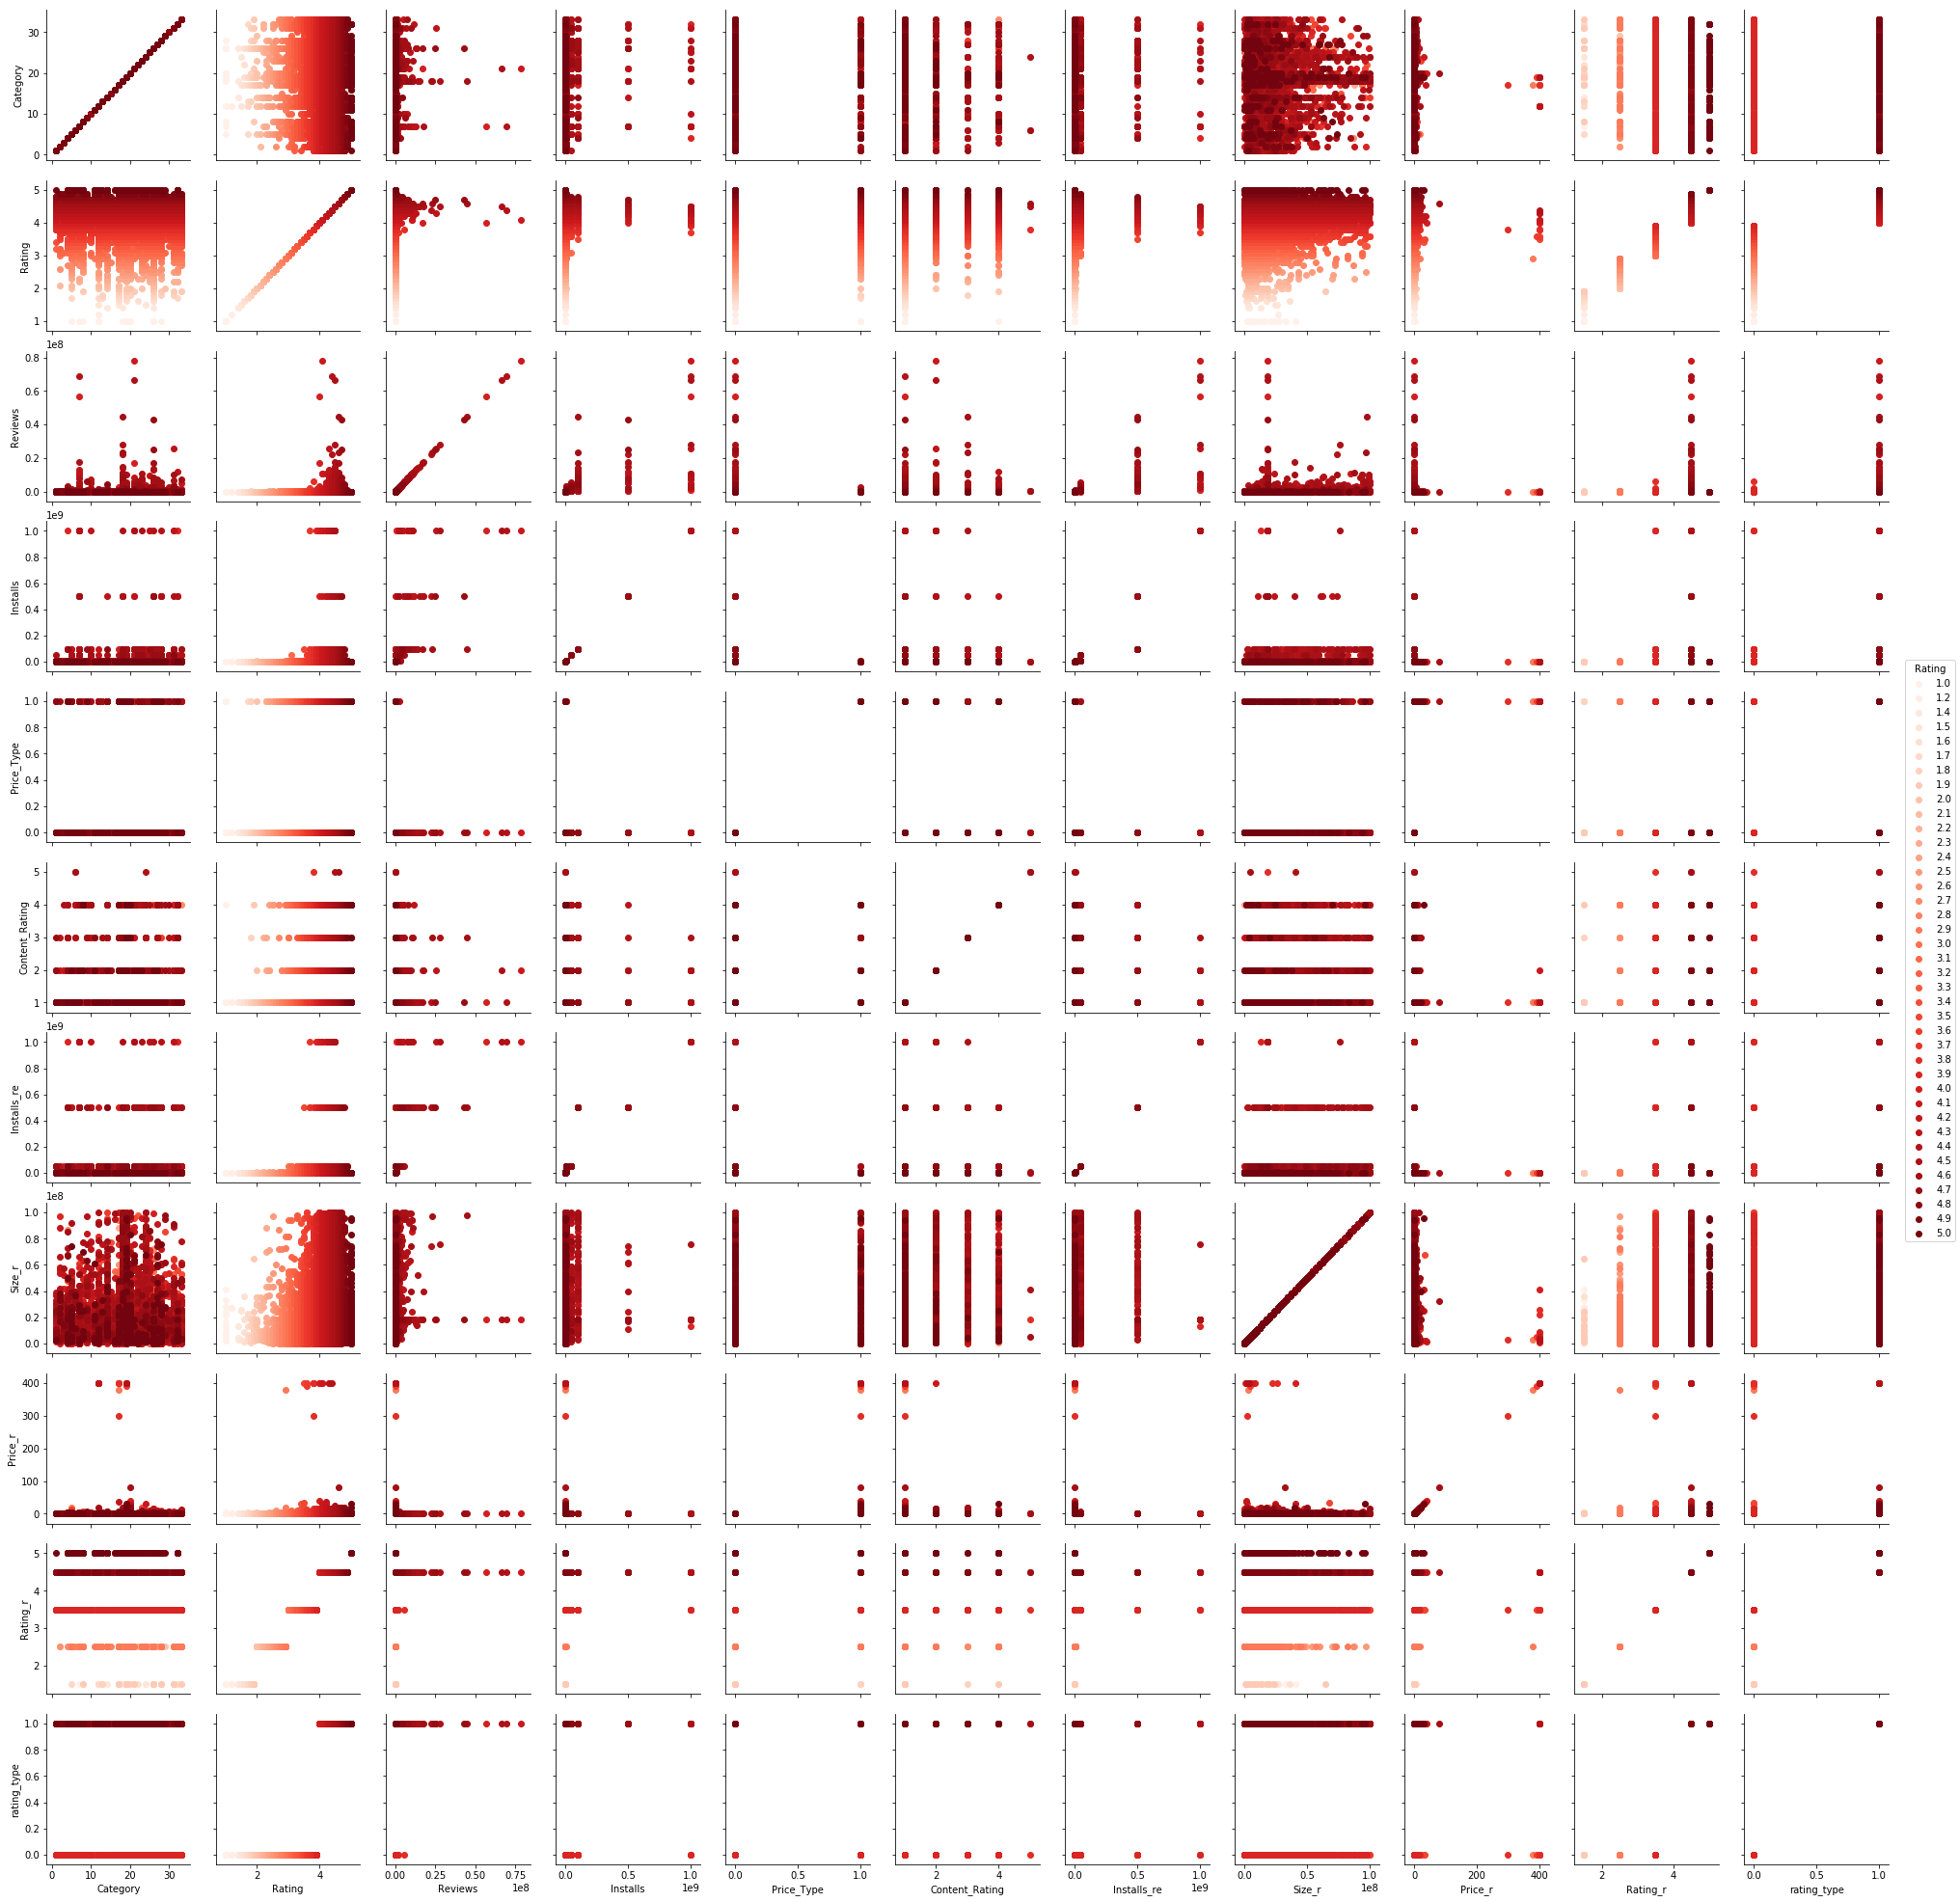

In [50]:
# Pair Grid - showing the relationships in the dataset


pairplot = sns.PairGrid(Gapp_info_re, hue = 'Rating', palette = 'Reds')
pairplot = pairplot.map(plt.scatter)
#pairplot = pairplot.map_diag(plt.hist, edgecolor = 'w')
pairplot = pairplot.add_legend()

### Regression Model comprised of App Rating and other variables

/Users/phoebewu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


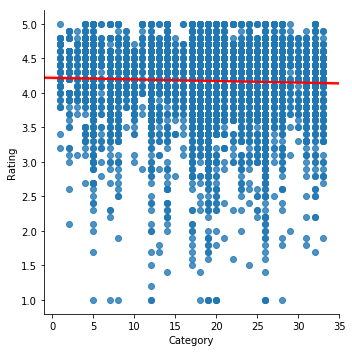

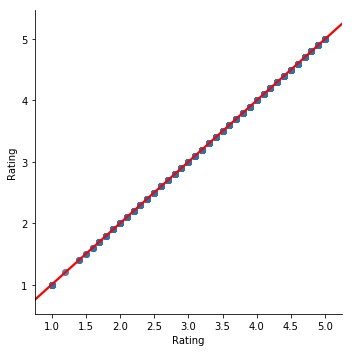

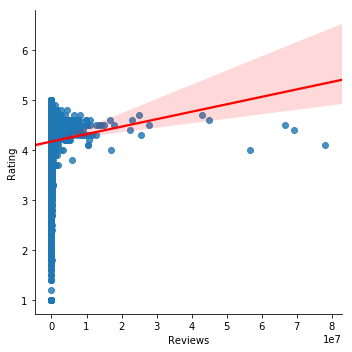

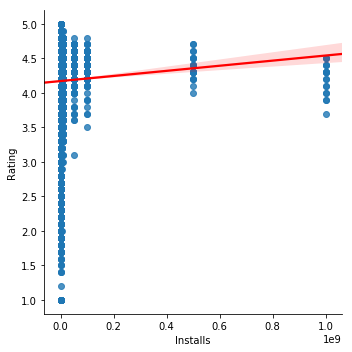

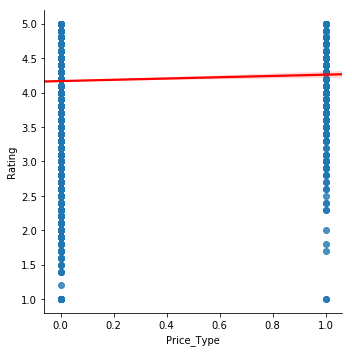

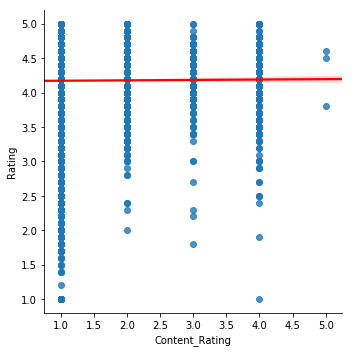

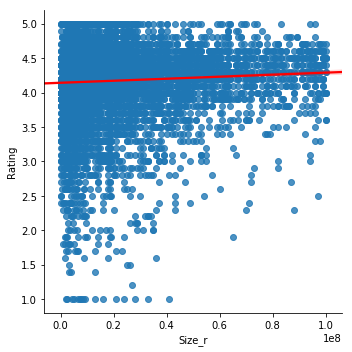

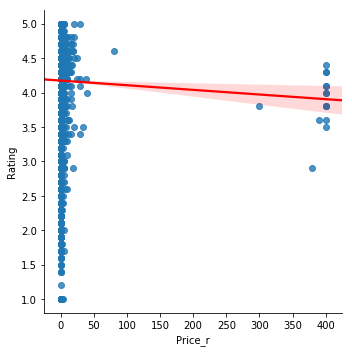

In [51]:
#Regression, Rating
cols = ['Category', 'Rating', 'Reviews', 'Installs', 'Price_Type', 'Content_Rating', 'Size_r', 'Price_r']

target_idx = len(cols) - 7
for exp_var_idx in range(len(cols)):
    
    sns.lmplot(x = Gapp_info_re[cols].columns[exp_var_idx], y = Gapp_info_re[cols].columns[target_idx], data = Gapp_info_re[cols], line_kws={"color":"red"})  
    
plt.tight_layout()
plt.show()

/Users/phoebewu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


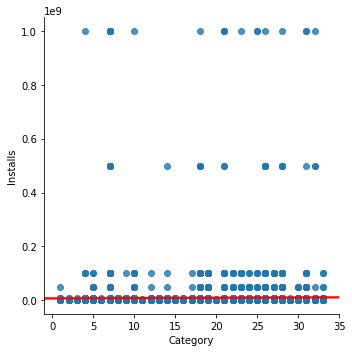

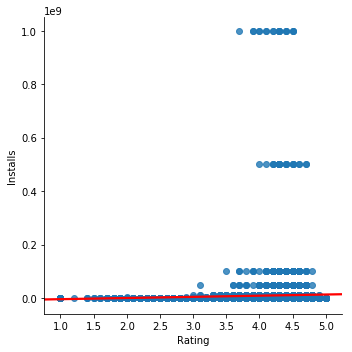

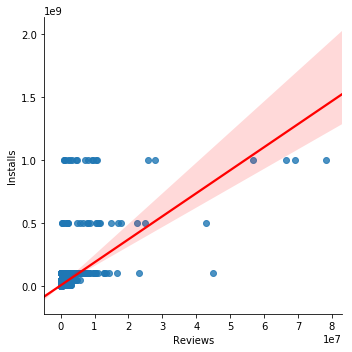

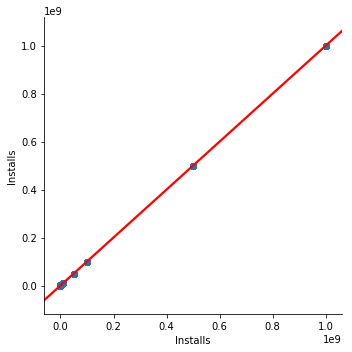

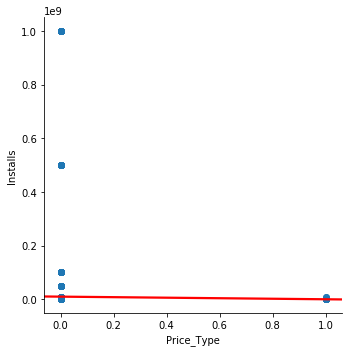

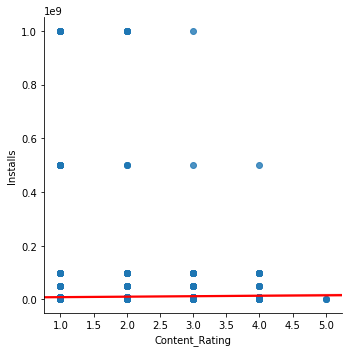

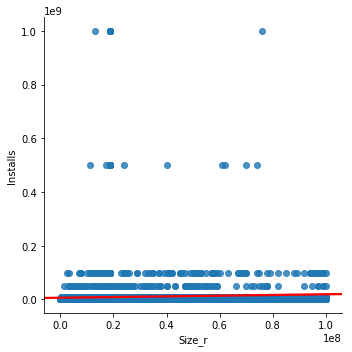

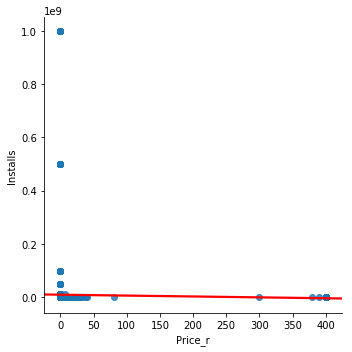

In [52]:
#Regression, Installs
cols = ['Category', 'Rating', 'Reviews', 'Installs', 'Price_Type', 'Content_Rating', 'Size_r', 'Price_r']

target_idx = len(cols) - 5
for exp_var_idx in range(len(cols)):
    
    sns.lmplot(x = Gapp_info_re[cols].columns[exp_var_idx], y = Gapp_info_re[cols].columns[target_idx], data = Gapp_info_re[cols], line_kws={"color":"red"})  
    
plt.tight_layout()
plt.show()

In [53]:
y = Gapp_info.iloc[:, 1:2].values.ravel()

class_le = LabelEncoder()
y = class_le.fit_transform(y)
Category = pd.DataFrame(y, columns = ['Category'])
Category.head()

,Category
0,1
1,1
2,1
3,1
4,1


### Comparison of Price Type(pay or not) and other Variables

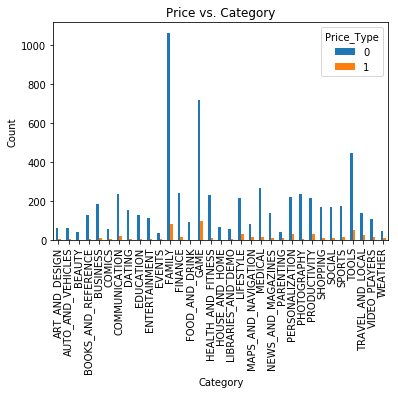

In [54]:
# Price vs. Category
pd.crosstab(Gapp_info.Category,Gapp_info_re.Price_Type).plot(kind='bar')
plt.title('Price vs. Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

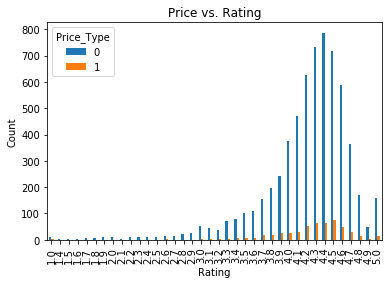

In [55]:
# Price vs. Rating 
pd.crosstab(Gapp_info.Rating,Gapp_info_re.Price_Type).plot(kind='bar')
plt.title('Price vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

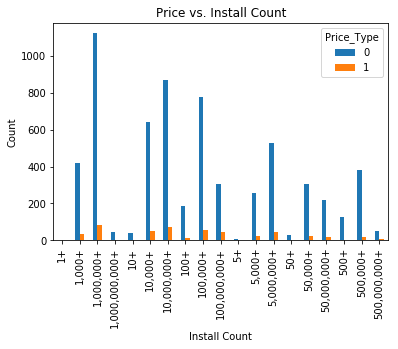

In [56]:
# Price vs. Rating 
pd.crosstab(Gapp_info.Installs,Gapp_info_re.Price_Type).plot(kind='bar')
plt.title('Price vs. Install Count')
plt.xlabel('Install Count')
plt.ylabel('Count')
plt.show()

### Top Rating (Rating >= 4.0)

In [75]:
Top_Rating = Gapp_info_re[Gapp_info_re['Rating'] >= 4.0]
Top_Rating.reset_index(inplace = True)
Top_Rating.head(10)

,index,App,Category,Rating,Reviews,Size,Installs,Price_Type,Price,Content_Rating,Installs_re,Price_r,Rating_r,rating_type
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,1,4.1,159.0,19M,10000,0,0,1,50000,0.0,4.5,1
1,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1,4.7,87510.0,8.7M,5000000,0,0,1,5000000,0.0,4.5,1
2,3,Sketch - Draw & Paint,1,4.5,215644.0,25M,50000000,0,0,2,50000000,0.0,4.5,1
3,4,Pixel Draw - Number Art Coloring Book,1,4.3,967.0,2.8M,100000,0,0,1,500000,0.0,4.5,1
4,5,Paper flowers instructions,1,4.4,167.0,5.6M,50000,0,0,1,50000,0.0,4.5,1
5,7,Infinite Painter,1,4.1,36815.0,29M,1000000,0,0,1,5000000,0.0,4.5,1
6,8,Garden Coloring Book,1,4.4,13791.0,33M,1000000,0,0,1,5000000,0.0,4.5,1
7,9,Kids Paint Free - Drawing Fun,1,4.7,121.0,3.1M,10000,0,0,1,50000,0.0,4.5,1
8,10,Text on Photo - Fonteee,1,4.4,13880.0,28M,1000000,0,0,1,5000000,0.0,4.5,1
9,11,Name Art Photo Editor - Focus n Filters,1,4.4,8788.0,12M,1000000,0,0,1,5000000,0.0,4.5,1


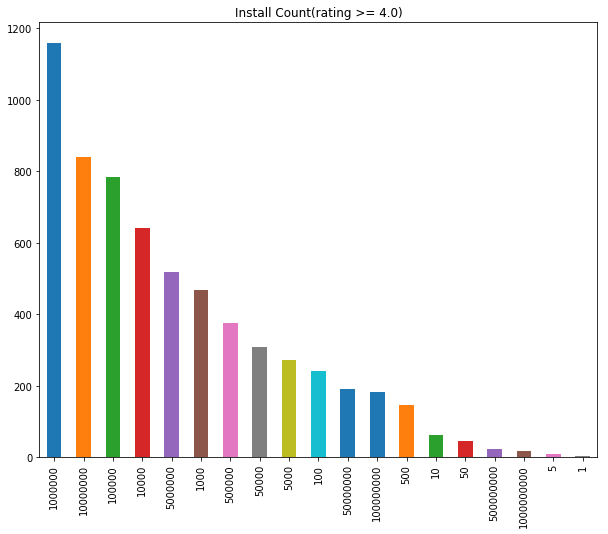

In [58]:
plt.figure(figsize=(10,8))
Top_Rating.Installs.value_counts().plot(kind = 'bar')
plt.title('Install Count(rating >= 4.0)')
plt.show()

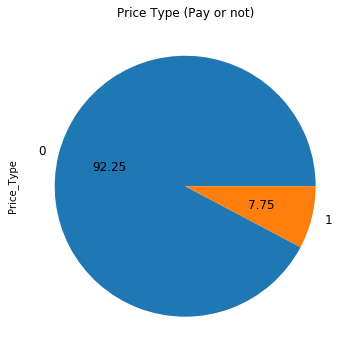

In [59]:
plt.figure(figsize=(6,6))
Top_Rating.Price_Type.value_counts().plot(kind = 'pie', autopct='%.2f', fontsize=12)
plt.title('Price Type (Pay or not)')
plt.show()

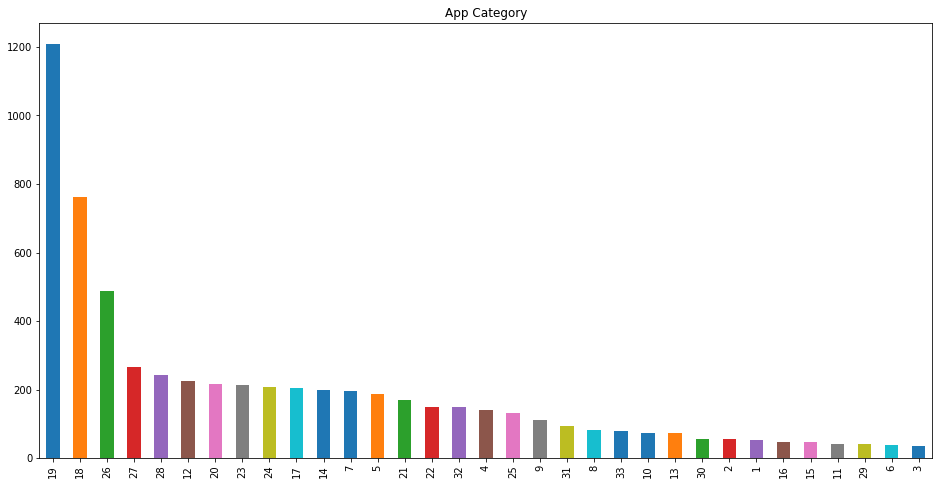

"('ART_AND_DESIGN', 1)\n('AUTO_AND_VEHICLES', 2)\n('BEAUTY', 3)\n('BOOKS_AND_REFERENCE', 4)\n('BUSINESS', 5)\n('COMICS', 6)\n('COMMUNICATION', 7)\n('DATING', 8)\n('EDUCATION', 9)\n('ENTERTAINMENT', 10)\n('EVENTS', 11)\n('FINANCE', 12)\n('FOOD_AND_DRINK', 13)\n('HEALTH_AND_FITNESS', 14)\n('HOUSE_AND_HOME', 15)\n('LIBRARIES_AND_DEMO', 16)\n('LIFESTYLE', 17)\n('GAME', 18)\n('FAMILY', 19)\n('MEDICAL', 20)\n('SOCIAL', 21)\n('SHOPPING', 22)\n('PHOTOGRAPHY', 23)\n('SPORTS', 24)\n('TRAVEL_AND_LOCAL', 25)\n('TOOLS', 26)\n('PERSONALIZATION', 27)\n('PRODUCTIVITY', 28)\n('PARENTING', 29)\n('WEATHER', 30)\n('VIDEO_PLAYERS', 31)\n('NEWS_AND_MAGAZINES', 32)\n('MAPS_AND_NAVIGATION', 33)\n\nTop 5: Family, Games, Tools, Personalization, Medical\n"

In [60]:
plt.figure(figsize=(16,8))
Top_Rating.Category.value_counts().plot(kind = 'bar')
plt.title('App Category')
plt.show()
'''('ART_AND_DESIGN', 1)
('AUTO_AND_VEHICLES', 2)
('BEAUTY', 3)
('BOOKS_AND_REFERENCE', 4)
('BUSINESS', 5)
('COMICS', 6)
('COMMUNICATION', 7)
('DATING', 8)
('EDUCATION', 9)
('ENTERTAINMENT', 10)
('EVENTS', 11)
('FINANCE', 12)
('FOOD_AND_DRINK', 13)
('HEALTH_AND_FITNESS', 14)
('HOUSE_AND_HOME', 15)
('LIBRARIES_AND_DEMO', 16)
('LIFESTYLE', 17)
('GAME', 18)
('FAMILY', 19)
('MEDICAL', 20)
('SOCIAL', 21)
('SHOPPING', 22)
('PHOTOGRAPHY', 23)
('SPORTS', 24)
('TRAVEL_AND_LOCAL', 25)
('TOOLS', 26)
('PERSONALIZATION', 27)
('PRODUCTIVITY', 28)
('PARENTING', 29)
('WEATHER', 30)
('VIDEO_PLAYERS', 31)
('NEWS_AND_MAGAZINES', 32)
('MAPS_AND_NAVIGATION', 33)

Top 5: Family, Games, Tools, Personalization, Medical
'''

### Installation Counts

In [65]:
Install_count = Gapp_info_re.sort_values('Installs',ascending = False).head(500)
Install_count.reset_index(inplace = True)
Install_count.head(10)

,index,App,Category,Rating,Reviews,Size,Installs,Price_Type,Price,Content_Rating,Installs_re,Size_r,Price_r,Rating_r,rating_type
0,2834,Google News,32,3.9,877635.0,13M,1000000000,0,0,2,1000000000,13000000.0,0.0,3.5,0
1,2788,Google Play Movies & TV,31,3.7,906384.0,Varies with device,1000000000,0,0,2,1000000000,18653076.0,0.0,3.5,0
2,287,Messenger – Text and Video Chat for Free,7,4.0,56642847.0,Varies with device,1000000000,0,0,1,1000000000,18653076.0,0.0,4.5,1
3,290,Google Chrome: Fast & Secure,7,4.3,9642995.0,Varies with device,1000000000,0,0,1,1000000000,18653076.0,0.0,4.5,1
4,292,Gmail,7,4.3,4604324.0,Varies with device,1000000000,0,0,1,1000000000,18653076.0,0.0,4.5,1
5,1882,Google+,21,4.2,4831125.0,Varies with device,1000000000,0,0,2,1000000000,18653076.0,0.0,4.5,1
6,293,Hangouts,7,4.0,3419249.0,Varies with device,1000000000,0,0,1,1000000000,18653076.0,0.0,4.5,1
7,337,Skype - free IM & video calls,7,4.1,10484169.0,Varies with device,1000000000,0,0,1,1000000000,18653076.0,0.0,4.5,1
8,2299,Google Street View,25,4.2,2129689.0,Varies with device,1000000000,0,0,1,1000000000,18653076.0,0.0,4.5,1
9,1873,Instagram,21,4.5,66577313.0,Varies with device,1000000000,0,0,2,1000000000,18653076.0,0.0,4.5,1


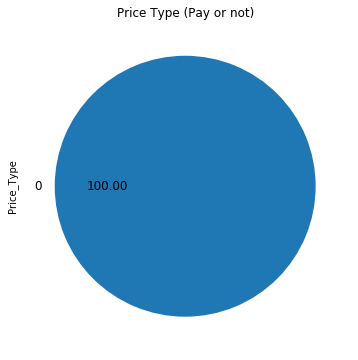

In [66]:
plt.figure(figsize=(6,6))
Install_count.Price_Type.value_counts().plot(kind = 'pie', autopct='%.2f', fontsize=12)
plt.title('Price Type (Pay or not)')
plt.show()

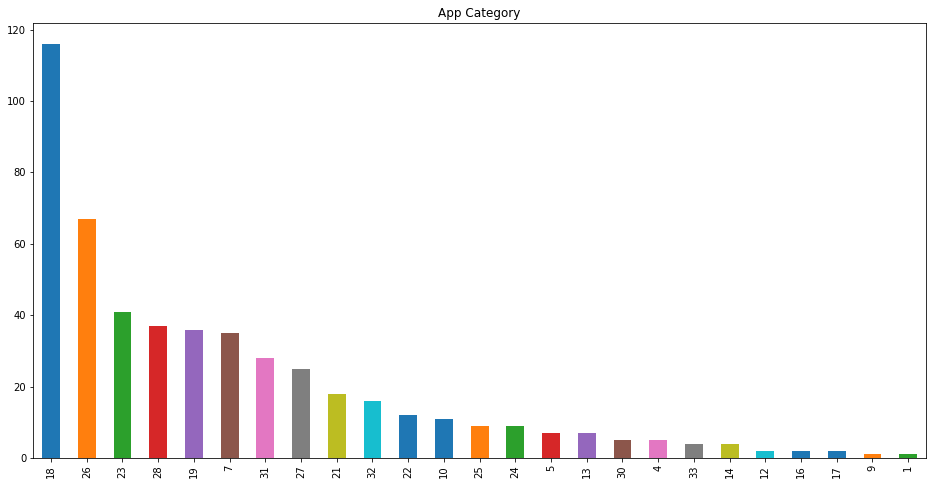

'\nTop 5:\nGame, Family, Tools, Photography, Shopping\n'

In [67]:
plt.figure(figsize=(16,8))
Install_count.Category.value_counts().plot(kind = 'bar')
plt.title('App Category')
plt.show()

'''
Top 5:
Game, Family, Tools, Photography, Shopping
'''

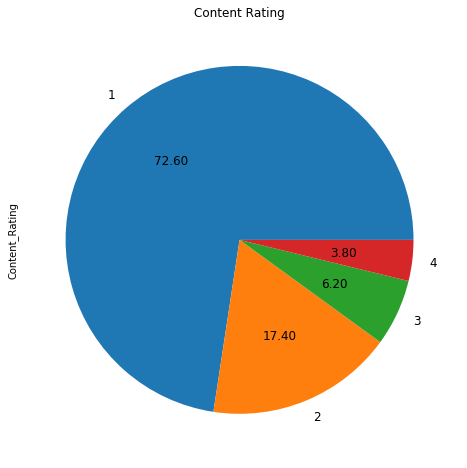

In [68]:
plt.figure(figsize=(8,8))
Install_count.Content_Rating.value_counts().plot(kind = 'pie', autopct='%.2f', fontsize=12)
plt.title('Content Rating')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn import neighbors

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Installation Analysis

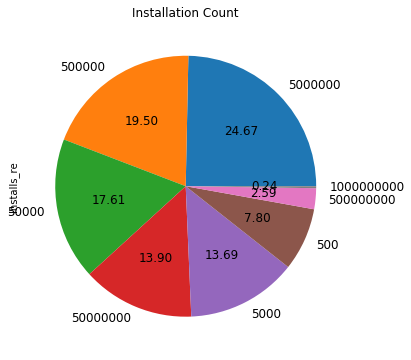

In [220]:
plt.figure(figsize=(6,6))
Gapp_info_re.Installs_re.value_counts().plot(kind = 'pie', autopct='%.2f', fontsize=12)
plt.title('Installation Count')
plt.show()

## Feature Importance for Install Count

In [192]:
fm_installcount = ['Category', 'Price_Type', 'Price_r', 'Content_Rating', 'Size_r']
y = Gapp_info_re.iloc[:,9:10].values.reshape(-1, 1)
X_df = Gapp_info_re.ix[:, fm_installcount]
X = Gapp_info_re.ix[:, fm_installcount].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train) 

importances = rfc.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_df.columns[:])

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

f_importances

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Size_r            0.641387
Category          0.286765
Price_r           0.034821
Content_Rating    0.030377
Price_Type        0.006650
dtype: float64

In [193]:
fscores = []
for k in range(1, 6):
    X = X_df[f_importances.index[:k]].values
    y = Gapp_info_re.iloc[:, 9:10].values.ravel()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    y_train = class_le.fit_transform(y_train)
    y_test = class_le.fit_transform(y_test)
    
    rfc_k = RandomForestClassifier()
    rfc_k.fit(X_train, y_train)
    
    y_pred_k = rfc_k.predict(X_test)
    
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_k, average='micro') 
    
    fscores.append(fscore)
    print("Top", k)
    print(f_importances.index[:k])
    print(precision, recall, fscore, support)

Top 1
Index(['Size_r'], dtype='object')
0.24109321620302587 0.24109321620302587 0.24109321620302587 None
Top 2
Index(['Size_r', 'Category'], dtype='object')
0.2457296242069302 0.2457296242069302 0.2457296242069302 None
Top 3
Index(['Size_r', 'Category', 'Price_r'], dtype='object')
0.255734504636408 0.255734504636408 0.255734504636408 None
Top 4
Index(['Size_r', 'Category', 'Price_r', 'Content_Rating'], dtype='object')
0.26500732064421667 0.26500732064421667 0.26500732064421667 None
Top 5
Index(['Size_r', 'Category', 'Price_r', 'Content_Rating', 'Price_Type'], dtype='object')
0.2637872132747682 0.2637872132747682 0.2637872132747682 None


## Random Forest for Installation count

In [36]:
train_score_ins = []
test_score_ins = []
F_score_ins = []

rf_installcount = ['Size_r', 'Category', 'Price_r', 'Content_Rating']

y = Gapp_info_re.Installs_re.values
X = Gapp_info_re.ix[:, rf_installcount].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train_std, y_train)
y_pred = rfc.predict(X_test_std)

train_score_ins.append(rfc.score(X_train_std, y_train))
test_score_ins.append(rfc.score(X_test_std, y_test))
F_score_ins.append(f1_score(y_test, y_pred, average='weighted'))

print('Training accuracy', rfc.score(X_train_std, y_train))
print('Testing accuracy', rfc.score(X_test_std, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy 0.7105198926043447
Testing accuracy 0.25939482674475356
[[ 55  59  70  62  51  21   1   0]
 [ 73 133 122  96 100  33   4   0]
 [ 70 143 154 145 162  40   8   0]
 [ 58  99 147 180 206  95  13   1]
 [ 49 106 133 161 384 160  12   6]
 [ 18  41  50  77 208 144  31   1]
 [  1   4   6   9  25  49  12   0]
 [  0   0   0   0   2   7   0   1]]
             precision    recall  f1-score   support

          0       0.17      0.17      0.17       319
          1       0.23      0.24      0.23       561
          2       0.23      0.21      0.22       722
          3       0.25      0.23      0.24       799
          4       0.34      0.38      0.36      1011
          5       0.26      0.25      0.26       570
          6       0.15      0.11      0.13       106
          7       0.11      0.10      0.11        10

avg / total       0.26      0.26      0.26      4098



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


## KNN for Installation Count

In [237]:
knn_installcount = ['Size_r', 'Category', 'Content_Rating', 'Price_r']

y = Gapp_info_re.Installs_re.values
X = Gapp_info_re.ix[:, knn_installcount].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 2000, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

n_neighbors = 10

knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)

train_score_ins.append(knn.score(X_train_std, y_train))
test_score_ins.append(knn.score(X_test_std, y_test))
F_score_ins.append(f1_score(y_test, y_pred, average='weighted'))

print(knn.score(X_test_std, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.26061493411420206
[[ 47  61  79  64  49  18   1   0]
 [ 65 138 129  82 121  25   1   0]
 [ 84 157 152 128 144  52   5   0]
 [ 55 103 157 186 225  70   2   1]
 [ 60  91 133 180 402 135   6   4]
 [ 14  36  47  84 235 139  13   2]
 [  0   5   9   7  38  41   4   2]
 [  0   0   0   1   6   3   0   0]]
             precision    recall  f1-score   support

          0       0.14      0.15      0.15       319
          1       0.23      0.25      0.24       561
          2       0.22      0.21      0.21       722
          3       0.25      0.23      0.24       799
          4       0.33      0.40      0.36      1011
          5       0.29      0.24      0.26       570
          6       0.12      0.04      0.06       106
          7       0.00      0.00      0.00        10

avg / total       0.26      0.26      0.26      4098



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [230]:
from sklearn.model_selection import StratifiedKFold

In [234]:
cv = StratifiedKFold(n_splits=10, random_state=1000)
n_neighbors = 10

y = Gapp_info_re.Installs_re.values
X = Gapp_info_re.ix[:, knn_installcount].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

score = []
for train_index, test_index in cv.split(X, y):
    X_train_std, X_test_std = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(X_train_std, y_train)
    score.append(clf.score(X_test_std, y_test))
    
score_m = sum(score)/ len(score)
print(score_m)    

0.2021113281816398


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


## Decision Tree

In [227]:
dt_installcount = ['Size_r', 'Category', 'Content_Rating', 'Price_r']

y = Gapp_info_re.Installs_re.values
X = Gapp_info_re.ix[:, dt_installcount].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 2000, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

dt = tree.DecisionTreeClassifier()
dt.fit(X_train_std,y_train)
y_pred = dt.predict(X_test_std)

train_score_ins.append(dt.score(X_train_std, y_train))
test_score_ins.append(dt.score(X_test_std, y_test))
F_score_ins.append(f1_score(y_test, y_pred, average='weighted'))

print("Decision Tree Testing accuracy: ",dt.score(X_test_std,y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Testing accuracy:  0.26183504148365055
[[ 55  81  76  57  35  14   1   0]
 [ 87 152 129  81  84  25   3   0]
 [104 167 166 122 110  49   4   0]
 [ 64 127 160 199 166  78   4   1]
 [ 73 115 147 177 338 147   9   5]
 [ 17  49  53  75 201 158  15   2]
 [  2   6   9   8  23  51   5   2]
 [  0   0   0   1   4   5   0   0]]
             precision    recall  f1-score   support

          0       0.14      0.17      0.15       319
          1       0.22      0.27      0.24       561
          2       0.22      0.23      0.23       722
          3       0.28      0.25      0.26       799
          4       0.35      0.33      0.34      1011
          5       0.30      0.28      0.29       570
          6       0.12      0.05      0.07       106
          7       0.00      0.00      0.00        10

avg / total       0.27      0.26      0.26      4098



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [228]:
Model_ins = ['Random Forest Classifier', 'KNN', 'Decision Tree']
Model_ins_comparison = pd.DataFrame(columns=['Classfier_name', 'train_score', 'test_score', 'F1_score'])

for i in range(3):
    Model_ins_comparison.loc[i, 'Classfier_name'] = Model_ins[i]
    Model_ins_comparison.loc[i, 'train_score'] = train_score_ins[i]
    Model_ins_comparison.loc[i, 'test_score'] = test_score_ins[i]
    Model_ins_comparison.loc[i, 'F1_score'] = F_score_ins[i]
    
Model_ins_comparison

,Classfier_name,train_score,test_score,F1_score
0,Random Forest Classifier,0.702953,0.27306,0.272172
1,KNN,0.419087,0.262811,0.25497
2,Decision Tree,0.727361,0.261835,0.262449


# Rating Analysis

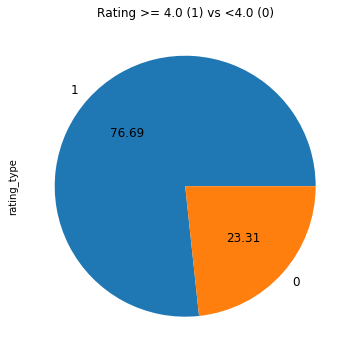

In [202]:
plt.figure(figsize=(6,6))
Gapp_info_re.rating_type.value_counts().plot(kind = 'pie', autopct='%.2f', fontsize=12)
plt.title('Rating >= 4.0 (1) vs <4.0 (0)')
plt.show()

## Feature Importance for Rating

In [114]:
Gapp_info_col = ['Category', 'Price_Type', 'Content_Rating', 'Size_r', 'Price_r']
y = Gapp_info_re.rating_type.values
X_rating = Gapp_info_re.ix[:, Gapp_info_col]
X = Gapp_info_re.ix[:, Gapp_info_col].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Random forest classifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train) 

importances = rfc.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_rating.columns[:])

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

f_importances

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


Size_r            0.651878
Category          0.280826
Price_r           0.033590
Content_Rating    0.028497
Price_Type        0.005210
dtype: float64

In [115]:
fscores = []
for k in range(1, 6):
    X = X_df[f_importances.index[:k]].values
    y = Gapp_info_re.iloc[:, 13:14].values.ravel()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    y_train = class_le.fit_transform(y_train)
    y_test = class_le.fit_transform(y_test)
    
    rfc_k = RandomForestClassifier(random_state=0)
    rfc_k.fit(X_train, y_train)
    
    y_pred_k = rfc_k.predict(X_test)
    
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_k, average='micro') 
    
    fscores.append(fscore)
    print("Top", k)
    print(f_importances.index[:k])
    print(precision, recall, fscore, support)

Top 1
Index(['Size_r'], dtype='object')
0.7592517283448557 0.7592517283448557 0.7592517283448557 None
Top 2
Index(['Size_r', 'Category'], dtype='object')
0.7010980073200488 0.7010980073200488 0.7010980073200488 None
Top 3
Index(['Size_r', 'Category', 'Price_r'], dtype='object')
0.7071980479869866 0.7071980479869866 0.7071980479869866 None
Top 4
Index(['Size_r', 'Category', 'Price_r', 'Content_Rating'], dtype='object')
0.689304595363969 0.689304595363969 0.689304595363969 None
Top 5
Index(['Size_r', 'Category', 'Price_r', 'Content_Rating', 'Price_Type'], dtype='object')
0.6884912566083774 0.6884912566083774 0.6884912566083774 None


## Random Forest for Rating

In [211]:
train_score = []
test_score = []
F_score = []

Gapp_info_col = ['Size_r', 'Category', 'Price_r']

y = Gapp_info_re.rating_type.values
X = Gapp_info_re.ix[:, Gapp_info_col].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1000, stratify=y)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train_std, y_train)
y_pred = rfc.predict(X_test_std)

train_score.append(rfc.score(X_train_std, y_train))
test_score.append(rfc.score(X_test_std, y_test))
F_score.append(f1_score(y_test, y_pred, average='weighted'))

print('Training accuracy', rfc.score(X_train_std, y_train))
print('Testing accuracy', rfc.score(X_test_std, y_test))
print(classification_report(y_test, y_pred))

Training accuracy 0.8544281729428173
Testing accuracy 0.7177714518096787
             precision    recall  f1-score   support

          0       0.35      0.24      0.28       573
          1       0.79      0.86      0.82      1886

avg / total       0.69      0.72      0.70      2459



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


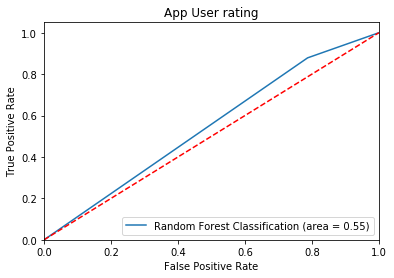

In [181]:
Model = []
Model.append('Random Forest Classification')
AUC_all = []
Fpr = []
Tpr = []

rf_roc_auc = roc_auc_score(y_test, y_pred)
AUC_all.append(rf_roc_auc)
fpr_f, tpr_f, thresholds_f = roc_curve(y_test, y_pred)
Fpr.append(fpr_f)
Tpr.append(tpr_f)
plt.figure()
plt.plot(fpr_f, tpr_f, label='Random Forest Classification (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('App User rating')
plt.legend(loc="lower right")

plt.show()

## KNN for Rating

In [212]:
knn_rating = ['Size_r', 'Category', 'Price_r']

y = Gapp_info_re.rating_type.values
X = Gapp_info_re.ix[:, Gapp_info_col].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1000, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

n_neighbors = 5

knn = neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)

train_score.append(knn.score(X_train_std, y_train))
test_score.append(knn.score(X_test_std, y_test))
F_score.append(f1_score(y_test, y_pred, average='weighted'))

print('Testing accuracy',knn.score(X_test_std, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Testing accuracy 0.7381049206994713
[[  97  476]
 [ 168 1718]]
             precision    recall  f1-score   support

          0       0.37      0.17      0.23       573
          1       0.78      0.91      0.84      1886

avg / total       0.69      0.74      0.70      2459



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


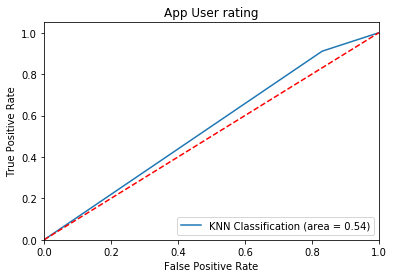

In [183]:
Model.append('KNN')
knn_roc_auc = roc_auc_score(y_test, y_pred)
AUC_all.append(knn_roc_auc)
fpr_f, tpr_f, thresholds_f = roc_curve(y_test, y_pred)
Fpr.append(fpr_f)
Tpr.append(tpr_f)
plt.figure()
plt.plot(fpr_f, tpr_f, label='KNN Classification (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('App User rating')
plt.legend(loc="lower right")

plt.show()

## Logistic Regression for Rating

In [213]:
lr_rating = ['Size_r', 'Category', 'Price_r']

y = Gapp_info_re.rating_type.values
X = Gapp_info_re.ix[:, Gapp_info_col].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_std,y_train)
y_pred = lr.predict(X_test_std)

train_score.append(lr.score(X_train_std, y_train))
test_score.append(lr.score(X_test_std, y_test))
F_score.append(f1_score(y_test, y_pred, average='weighted'))

print("Logistic Regression Testing accuracy: ",lr.score(X_test_std,y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Testing accuracy:  0.7669784465229769
[[   0  573]
 [   0 1886]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       573
          1       0.77      1.00      0.87      1886

avg / total       0.59      0.77      0.67      2459



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [205]:
lr_rating = ['Size_r', 'Category', 'Price_r']

y = Gapp_info_re.rating_type.values
X = Gapp_info_re.ix[:, Gapp_info_col].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_std,y_train)
y_pred = lr.predict(X_test_std)

print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred))

0.6663951888664876
0.766571777145181
0.4356375390245151
0.8678028558268079


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


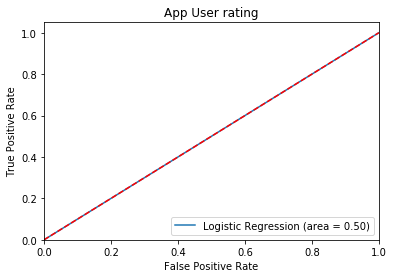

In [185]:
Model.append('Logistic Regression')
lr_roc_auc = roc_auc_score(y_test, y_pred)
AUC_all.append(lr_roc_auc)
fpr_f, tpr_f, thresholds_f = roc_curve(y_test, y_pred)
Fpr.append(fpr_f)
Tpr.append(tpr_f)
plt.figure()
plt.plot(fpr_f, tpr_f, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('App User rating')
plt.legend(loc="lower right")

plt.show()

## Decision Tree

In [214]:
dt_rating = ['Size_r', 'Category', 'Price_r']

y = Gapp_info_re.rating_type.values
X = Gapp_info_re.ix[:, Gapp_info_col].values

class_le = LabelEncoder()
y = class_le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

dt = tree.DecisionTreeClassifier()
dt.fit(X_train_std,y_train)
y_pred = dt.predict(X_test_std)

train_score.append(dt.score(X_train_std, y_train))
test_score.append(dt.score(X_test_std, y_test))
F_score.append(f1_score(y_test, y_pred, average='weighted'))

print("Decision Tree Testing accuracy: ",dt.score(X_test_std,y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Testing accuracy:  0.6762911752745018
[[ 137  436]
 [ 360 1526]]
             precision    recall  f1-score   support

          0       0.28      0.24      0.26       573
          1       0.78      0.81      0.79      1886

avg / total       0.66      0.68      0.67      2459



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [204]:
print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred))

0.6676048105228056
0.6771045140300935
0.5225686395336326
0.7941938828408501


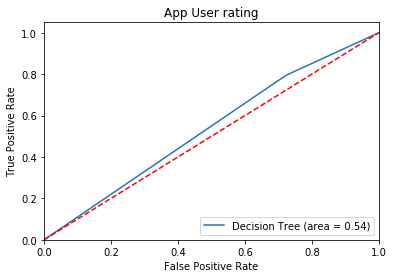

In [187]:
Model.append('Decision Tree')
dt_roc_auc = roc_auc_score(y_test, y_pred)
AUC_all.append(dt_roc_auc)
fpr_f, tpr_f, thresholds_f = roc_curve(y_test, y_pred)
Fpr.append(fpr_f)
Tpr.append(tpr_f)
plt.figure()
plt.plot(fpr_f, tpr_f, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('App User rating')
plt.legend(loc="lower right")

plt.show()

### Model Comparison

In [215]:
Model_comparison = pd.DataFrame(columns=['Classfier_name', 'train_score', 'test_score', 'F1_score'])

for i in range(4):
    Model_comparison.loc[i, 'Classfier_name'] = Model[i]
    Model_comparison.loc[i, 'train_score'] = train_score[i]
    Model_comparison.loc[i, 'test_score'] = test_score[i]
    Model_comparison.loc[i, 'F1_score'] = F_score[i]
    
Model_comparison

,Classfier_name,train_score,test_score,F1_score
0,Random Forest Classification,0.854428,0.717771,0.698182
1,KNN,0.786262,0.738105,0.699861
2,Logistic Regression,0.766911,0.766978,0.665833
3,Decision Tree,0.863668,0.676291,0.667992


### AUC ROC Comparison

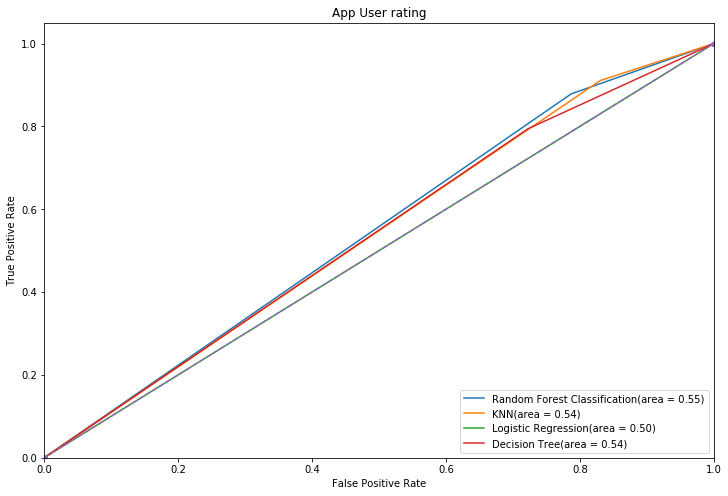

In [189]:
plt.figure(figsize=(12,8))

for i in range(4):
    plt.plot(Fpr[i], Tpr[i], label = Model[i] + '(area = %0.2f)' % AUC_all[i])
    
plt.plot([0, 1], [0, 1],'p--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('App User rating')
plt.legend(loc="lower right")

plt.show() 